# Part 1: Imports, data uploads and preparation.

As is customary, let us first call the Python libraries needed here, and upload the needed data and code.

In [2]:
from model import setup, balance_calcs, func_FDC, visuals
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import datetime

## Loading model and water balance for historical data

In this tutorial we will compute performance, then compare it for the scenarios defined in Tutorial 3. First let's compute the historical water balance.

In [4]:
# Preparing the model
reservoir_name = 'Conowingo'
downstream_demand_names = ['Environmental']
direct_demand_names = ['Baltimore', 'Chester', 'Nuclear plant']

# Loading the model!
conowingo = setup.define_reservoir(reservoir_name, downstream_demand_names, direct_demand_names)

# Read flow and demand data. We keep this copy of the data for the simulation of different futures.
flows_default = setup.extract_flows(reservoir=conowingo)
display(flows_default)

,Total inflows (m3/s),Baltimore demand (m3/s),Chester demand (m3/s),Nuclear plant demand (m3/s),Environmental demand (m3/s)
Date,,,,,
1932-01-01,557.049006,13.139017,1.472476,0.622971,99.108963
1932-01-02,638.488257,13.139017,1.472476,0.622971,99.108963
1932-01-03,758.806538,13.139017,1.472476,0.622971,99.108963
1932-01-04,824.048553,13.139017,1.472476,0.622971,99.108963
1932-01-05,780.383975,13.139017,1.472476,0.622971,99.108963
...,...,...,...,...,...
2001-12-27,775.966547,13.139017,1.444159,0.651287,99.108963
2001-12-28,716.529486,13.139017,1.444159,0.651287,99.108963
2001-12-29,668.362530,13.139017,1.444159,0.651287,99.108963


In [5]:
# First, make a copy of the flows to initialise the water balance
historical_balance = flows_default.copy()  # Keep flows_default as an untouched copy

# Computing the water balance for our standard operating policy (SOP)
balance_calcs.sop_full(reservoir=conowingo, water_flows=historical_balance)

,Total inflows (m3/s),Baltimore demand (m3/s),Chester demand (m3/s),Nuclear plant demand (m3/s),Environmental demand (m3/s),Withdrawals Baltimore (m3/s),Withdrawals Chester (m3/s),Withdrawals Nuclear plant (m3/s),Outflows (m3/s),Storage (m3)
Date,,,,,,,,,,
1932-01-01,557.049006,13.139017,1.472476,0.622971,99.108963,13.139017,1.472476,0.622971,101.999728,380000000.0
1932-01-02,638.488257,13.139017,1.472476,0.622971,99.108963,13.139017,1.472476,0.622971,623.253793,380000000.0
1932-01-03,758.806538,13.139017,1.472476,0.622971,99.108963,13.139017,1.472476,0.622971,743.572075,380000000.0
1932-01-04,824.048553,13.139017,1.472476,0.622971,99.108963,13.139017,1.472476,0.622971,808.814089,380000000.0
1932-01-05,780.383975,13.139017,1.472476,0.622971,99.108963,13.139017,1.472476,0.622971,765.149512,380000000.0
...,...,...,...,...,...,...,...,...,...,...
2001-12-27,775.966547,13.139017,1.444159,0.651287,99.108963,13.139017,1.444159,0.651287,760.732084,380000000.0
2001-12-28,716.529486,13.139017,1.444159,0.651287,99.108963,13.139017,1.444159,0.651287,701.295023,380000000.0
2001-12-29,668.362530,13.139017,1.444159,0.651287,99.108963,13.139017,1.444159,0.651287,653.128067,380000000.0


# Part 2: performance metrics

Management objectives are as follows:
1) Produce hydropower
2) Meet environmental flows
3) Meet domestic and industrial demands
4) Avoid excessive flooding that would require evacuating the downstream town of “Port Deposit” (15,000 m3/s)
5) Maintain a water level compatible with recreation (hydraulic head over 106.5 ft, where 1ft = 0.3048 m) in June, July and August.

First, we will explore objective (1), and we will then focus on the other objectives. For these objectives, we will compare the water flows / levels versus a threshold, and use the R-R-V indicators defined in the lecture (reliability / resilience / vulnerability).


## 2.1 - Hydropower

For Conowingo Dam, key parameters of the hydropower plant can be found in the **"Reservoir characteristics"** part of the spreadsheet.

In [7]:
# First we download the key data
key_parameters = pd.read_excel('data/Conowingo_data.xlsx', sheet_name='Reservoir characteristics')

# We define the hydropower station parameters
installed_capacity = key_parameters.iloc[4, 1]
nominal_head = key_parameters.iloc[3, 1]
max_release = key_parameters.iloc[5, 1]

# Variables
rho = 1000 # Density of water, kg/m3
g = 9.81 # Acceleration of gravity, m/s2

From this we can use the equation given in the lecture, linking hydropower station parameters to power production, to deduce the combined efficiency of converting potential energy into kinetic energy (through the turbine) and of converting this kinetic energy to electricity.

In [9]:
# Deduce efficiency
efficiency = installed_capacity*1E6 / (rho*g*nominal_head*max_release)
print("Turbines and plant combined efficiency is " + "{:.3f}".format(efficiency))

Turbines and plant combined efficiency is 0.853


With these parameters and the water balance, we can get time series of daily hydropower production.

Text(0, 0.5, 'Daily hydropower production (GWh)')

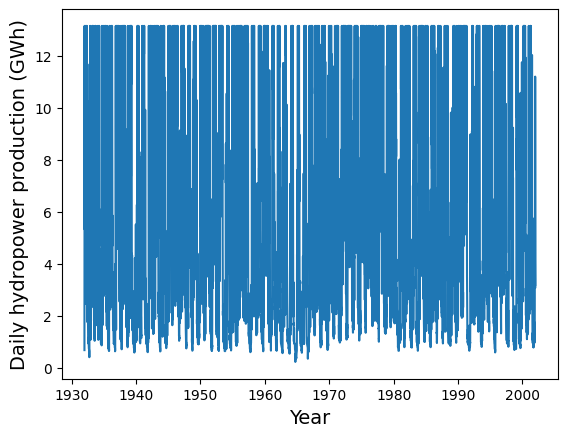

In [11]:
# Get hydropower production time series

n_steps = len(historical_balance)

# Get release time series (capped by max release)
release = np.minimum(historical_balance['Outflows (m3/s)'].values, np.ones(n_steps)*max_release)

# Get hydraulic head time series
hy_head = np.zeros(n_steps)
for t in range(n_steps):
  depth = conowingo.get_height(historical_balance.iloc[t, -1])
  hy_head[t] = nominal_head - conowingo.total_lake_depth + depth

# Deduce daily hydropower production time series (in MWh)
hydropower_daily = pd.Series(index=historical_balance.index, data=rho*g*efficiency*np.multiply(hy_head, release)*24/1E6, name='Daily hydropower production (MWh)')

plt.plot(hydropower_daily.index, hydropower_daily/1000)
plt.xlabel('Year', size=14)
plt.ylabel('Daily hydropower production (GWh)', size=14)

This is not a very helpful visual, and aggregation to annual data will certainly be helpful.

In [13]:
# Let us get annual hydropower production

# First the headline number: average over 70 years (GWh)
print('Annual average hydropower production at Conowingo is ' + "{:.0f}".format(hydropower_daily.sum() / 70 / 1000) + ' GWh')

Annual average hydropower production at Conowingo is 2064 GWh


In [14]:
# Now the time series
hydropower_annual = hydropower_daily.resample('YE').sum()/1000
hydropower_annual.name = 'Annual hydropower production (GWh)'

print('Check we have the same average. \nAnnual average hydropower production at Conowingo is ' + "{:.0f}".format(hydropower_annual.mean()) + ' GWh')

Check we have the same average. 
Annual average hydropower production at Conowingo is 2064 GWh


(1932.0, 2001.0)

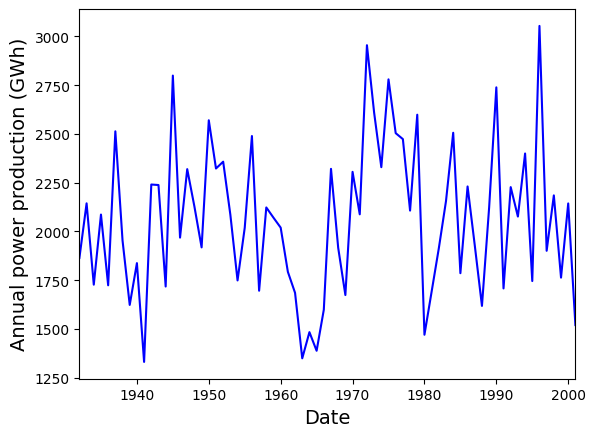

In [15]:
# Let us plot it
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(hydropower_annual.index.year, hydropower_annual, c='b', label='No intake')
ax.set_xlabel('Date', size=14)
ax.set_ylabel('Annual power production (GWh)', size=14)

# We set the boundaries of the x-axis
ax.set_xlim(hydropower_annual.index.year[0], hydropower_annual.index.year[-1])

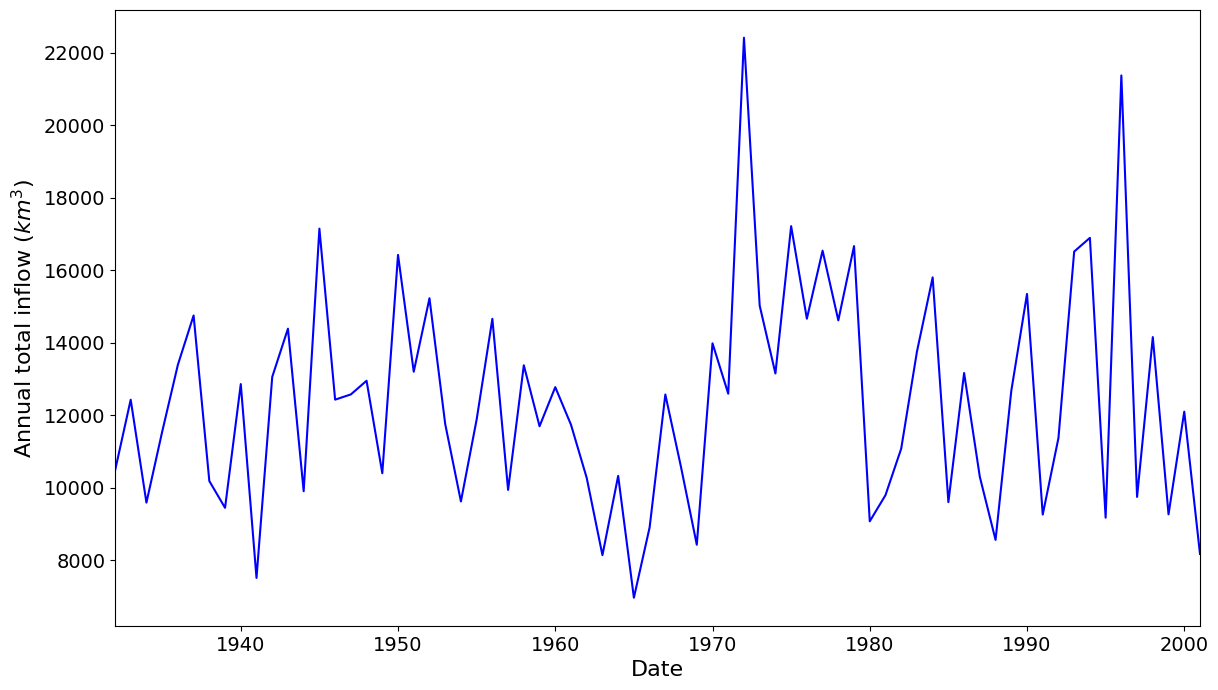

In [34]:
# let us compare with annual average flows.
fig = visuals.annual_average(daily_data=pd.Series(historical_balance['Total inflows (m3/s)']) * 365*86400/1E9, 
                             data_label='total inflow ($km^3$)')

**Question 1. What can we say about the correlation between inflows and hydropower production?**


## 2.2 - R-R-V indicators

Let us now introduce a function to compute the R-R-V performance metrics introduced in the lecture.

**Question 2. In the function below, do you recognise the forumlas given in the lecture? What are extra steps that need to be taken? And why do we measure vulnerability as percentage?**

In [42]:
def rrv_indicators(time_series, dynamic_threshold, above_desirable, name, **kwargs):
    """
    Compute the RRV indicators for a time series vs. a threshold. Arguments:
        time_series: numpy vector
        dynamic_threshold: numpy vectors of same length as `time_series`
        above_desirable: boolean. If True we value staying at or above a threshold.
        name: String, the name of the site
        optional argument `vul_unit`: String, default as a percentage, to specify how vulnerability is evaluated
    Returns a pandas DataFrame with several perf_metrics metrics.
    """

    # Optional argument
    vul_unit = kwargs.pop("vul_unit", '%')

    # Local variables
    n_steps = len(time_series)
    tolerance = 1E-6  # for rounding errors

    # If above_desirable is false we need to change sign of all data now, so we compare a and b
    a = (2 * above_desirable - 1) * time_series
    b = (2 * above_desirable - 1) * dynamic_threshold
    b = b - tolerance

    # Initialise output
    indicators = pd.DataFrame(columns=['Name', 'Reliability (0-1)', 'Resilience (-)', 'Vulnerability', 'Failure count'])
    indicators.loc[0, 'Name'] = name

    # Reliability
    indicators.loc[0, 'Reliability (0-1)'] = 1 - np.sum(a < b) / n_steps

    # We need to count failure events to compute resilience and vulnerability
    event_count = 0
    # We also need to have the maximal amplitude or magnitude of failure
    magnitude = []
    # We use a while loop to count events and their magnitude
    t = 0
    while t < n_steps:

        if a[t] < b[t]:
            # New event! we need to update the count of failure events
            event_count = event_count + 1
            # We also need to keep track of the maximum amplitude of failure
            # By default failure is expressed in relative terms
            if vul_unit == '%':
                magnitude.append((b[t] - a[t]) / abs(b[t]))
            else:
                magnitude.append(b[t] - a[t])
            # Now while event lasts
            while a[t] < b[t]:
                t = t+1
                if t == n_steps:
                    break
                if vul_unit == '%':
                    magnitude[-1] = max(magnitude[-1], (b[t] - a[t]) / abs(b[t]))
                else:
                    magnitude[-1] = max(magnitude[-1], b[t] - a[t])

        # Time increment so while loop concludes
        t = t+1

    # Resilience
    indicators.loc[0, 'Resilience (-)'] = event_count / (n_steps * (1 - indicators.loc[0, 'Reliability (0-1)']))

    # Vulnerability (as a percentage)
    if vul_unit == '%':
        indicators.loc[0, 'Vulnerability'] = "{:.0f}".format(np.mean(magnitude) * 100) + '%'
    else:
        indicators.loc[0, 'Vulnerability'] = "{:.2f}".format(np.mean(magnitude)) + vul_unit

    # Finally, exporting the failure count
    indicators.loc[0, 'Failure count'] = event_count

    return indicators

In [77]:
# Application to all four Conowingo demands
metrics = pd.concat([rrv_indicators(historical_balance['Withdrawals Baltimore (m3/s)'].to_numpy(), 
                                    historical_balance['Baltimore demand (m3/s)'].to_numpy(), True, 'Baltimore'),
                     rrv_indicators(historical_balance['Withdrawals Chester (m3/s)'].to_numpy(), 
                                    historical_balance['Chester demand (m3/s)'].to_numpy(), True, 'Chester'),
                     rrv_indicators(historical_balance['Withdrawals Nuclear plant (m3/s)'].to_numpy(), 
                                    historical_balance['Nuclear plant demand (m3/s)'].to_numpy(), True, 'Nuclear'),
                     rrv_indicators(historical_balance['Outflows (m3/s)'].to_numpy(), 
                                    historical_balance['Environmental demand (m3/s)'].to_numpy(), True, 'Env. flows')],
                     axis=0, ignore_index=True)

print('Performance metrics for demands are:\n')
display(metrics)

Performance metrics for demands are:



,Name,Reliability (0-1),Resilience (-),Vulnerability,Failure count
0,Baltimore,0.993547,0.048485,100%,8
1,Chester,0.980327,0.023857,100%,12
2,Nuclear,0.974343,0.025915,100%,17
3,Env. flows,0.997614,0.098361,34%,6


In [79]:
# Same for flooding
flooding_metrics = rrv_indicators(time_series=historical_balance['Outflows (m3/s)'].to_numpy(), 
                                  dynamic_threshold=15000*np.ones(len(historical_balance)), 
                                  above_desirable=False, 
                                  name='Flooding')

metrics = pd.concat([metrics, flooding_metrics], axis=0, ignore_index=True)

print('Performance metrics including demands and flooding are:\n')
display(metrics)

Performance metrics including demands and flooding are:



,Name,Reliability (0-1),Resilience (-),Vulnerability,Failure count
0,Baltimore,0.993547,0.048485,100%,8
1,Chester,0.980327,0.023857,100%,12
2,Nuclear,0.974343,0.025915,100%,17
3,Env. flows,0.997614,0.098361,34%,6
4,Flooding,0.999687,0.5,36%,4


**Question 3. Compute how long it takes a flood at the flooding threshold to completely fill Conowingo, and use this to comment on the reliability, resilience and vulnerability for the flooding objective. In particular, can we use different operating policies to avoid flooding the town downstream of Conowingo (Port Deposit)?**

We have now computed metrics for objectives (1) to (4) under historical flows and the standard operating policy (SOP). We now need to evaluate the last objective, summer recreation. The key difference is that the three over seasons (75% of time) don't count towards reliability calculations. This necessitates extra leg work.

In [82]:
# Summer recreation (lake levels need to stay above a certain level in June, July and August)

# We need time series of level objectives. We initialise at 0 requirement.
level_objective = pd.Series(index=historical_balance.index, data=np.zeros(len(historical_balance)))

# We set a level during summer months, to be compared with lake level (which coincide with hydraulic head)
summer_requirement = 106.5*0.3048
for month in np.arange(6, 9, 1):
    level_objective[level_objective.index.month == month] = summer_requirement

# Get hydraulic head time series, assuming linear relationship between depth and lake area
hydraulic_head = np.zeros(len(historical_balance))
for t in range(len(historical_balance)):
    depth = conowingo.get_height(historical_balance.iloc[t, -1])
    hydraulic_head[t] = conowingo.hydropower_plant.nominal_head - conowingo.total_lake_depth + depth

# Get the indicators
recreation_metrics = rrv_indicators(hydraulic_head, level_objective.to_numpy(), True, 'Recreation', vul_unit='m')

# We need to account for the fact that this requirement is for three months only, which impacts reliability
# Failure happens more often if measured in the shorter time window
recreation_metrics.iloc[0, 1] = 1 - (1-recreation_metrics.iloc[0, 1]) * len(level_objective) / (70*(30+31+31))

metrics = pd.concat([metrics, recreation_metrics], axis=0, ignore_index=True)
print('Performance metrics including demands, flooding and recreation are:\n')
display(metrics)

Performance metrics including demands, flooding and recreation are:



,Name,Reliability (0-1),Resilience (-),Vulnerability,Failure count
0,Baltimore,0.993547,0.048485,100%,8
1,Chester,0.980327,0.023857,100%,12
2,Nuclear,0.974343,0.025915,100%,17
3,Env. flows,0.997614,0.098361,34%,6
4,Flooding,0.999687,0.5,36%,4
5,Recreation,0.945342,0.048295,1.87m,17


In [84]:
# Add a new column, volumetric reliability
metrics.insert(5, 'Volumetric reliability', [0, 0, 0, 0, 'N/A', 'N/A'])
display(metrics)

,Name,Reliability (0-1),Resilience (-),Vulnerability,Failure count,Volumetric reliability
0,Baltimore,0.993547,0.048485,100%,8,0
1,Chester,0.980327,0.023857,100%,12,0
2,Nuclear,0.974343,0.025915,100%,17,0
3,Env. flows,0.997614,0.098361,34%,6,0
4,Flooding,0.999687,0.5,36%,4,N/A
5,Recreation,0.945342,0.048295,1.87m,17,N/A


In [88]:
# Volumetric reliability is only defined for the demands, and it relies on the grand total supply / demand
totals = historical_balance.sum(axis=0)

metrics.loc[0, 'Volumetric reliability'] = totals['Withdrawals Baltimore (m3/s)'] / totals['Baltimore demand (m3/s)']
metrics.loc[1, 'Volumetric reliability'] = totals['Withdrawals Chester (m3/s)'] / totals['Chester demand (m3/s)']
metrics.loc[2, 'Volumetric reliability'] = totals['Withdrawals Nuclear plant (m3/s)'] / totals['Nuclear plant demand (m3/s)']
metrics.loc[3, 'Volumetric reliability'] = np.sum(np.minimum(historical_balance['Environmental demand (m3/s)'], 
                                                             historical_balance['Outflows (m3/s)'])) / totals['Environmental demand (m3/s)']

display(metrics)

,Name,Reliability (0-1),Resilience (-),Vulnerability,Failure count,Volumetric reliability
0,Baltimore,0.993547,0.048485,100%,8,0.993547
1,Chester,0.980327,0.023857,100%,12,0.980099
2,Nuclear,0.974343,0.025915,100%,17,0.972667
3,Env. flows,0.997614,0.098361,34%,6,0.999565
4,Flooding,0.999687,0.5,36%,4,N/A
5,Recreation,0.945342,0.048295,1.87m,17,N/A


**Question 4. Which objectives do you feel the chosen operating policy favours? Why?**

# Prioritising current water uses with economic principles?

Until now we assumed that users took the water if it was available. But now we are the regulator and we want to make sure storage is regulated to make sure the most valuable uses are rewarded, even if that means some users have to scale back on water withdrawals even as they could take more. 

Before negotiating with the different users we need to have an idea which uses would be prioritised in practice. We need to know, depending on head (h) in the reservoir, how a quantity of water Q that we decide to allocate for releases / withdrawals breaks down between users. All prices in USD. Our starting assumptions are:

=> We prioritise ecological conservation and give water for meeting environmental flows a value of USD 10/m3.

=> Baltimore and Chester both have alternative sources of water supply so we assume a water value for their uses that is linear at USD 3/m3. If there is a water shortage for them, we assume it will be equal in proportion for both cities.

=> Average benefits from hydropower USD 60/MWh.

=> Average benefits from nuclear power production USD 40/MWh.

Hydropower is more valuable on average than nuclear power (per MWh), because turbines can be turned on or off almost instantly so hydropower can easily meet peak demand (more expensive) whereas nuclear power meets the base load.

#### Question 3
Given the average annual power production from Peach Bottom is around 20,000 GWh, and that all of it needs cooling water, what’s the average value of a m3 in USD?

In [ ]:
# If you have calculations you can use this to do them before looking up the answers.

#### Question 4
How much water does it take to produce 1MWh of hydropower? What does it mean for the value of water for hydropower?

In [ ]:
# If you have calculations you can use this to do them before looking up the answers.

#### Question 5 
With this in mind, how can we prioritise uses if the lake is full on a given day? If the water level is 3 metres lower than full?

#### Question 6
How sensitive is this order to the assumptions made? Were all those assumptions driven by economics alone?

#### Question 7
Does this evaluation support releasing water for hydropower production when the reservoir is not full?

#### Question 8
If we had not valued ecological flows, what would be the consequences?

#### Question 9
Overall, do the failure indicators reflect how valuable respective uses are? If not, what could be done to improve that?